### Import Dataset

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('./datasetFinal.csv')
scaler = StandardScaler()

names = df.columns
d = scaler.fit_transform(df)

df = pd.DataFrame(d, columns = names)

y = df['generated_power']
X = df.drop(columns='generated_power')

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Training Model 
#### SVM Linear Regression
    score = 0.8504015779914551


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR

svm_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_poly_reg", LinearSVR()),
])

svm_linear.fit(x_train,y_train)

print('score', svm_linear.score(x_test,y_test))

score 0.8504015779914551


/home/pardalito/anaconda3/envs/meia/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### Polinomial Regression
score = 0.7440280771578609

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

""" svm_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_poly_reg", SVR(kernel="poly", degree=2, C=100, epsilon=0.1)),
]) """

svm_poly = SVR(kernel="poly")

svm_poly.fit(x_train,y_train)

print('score', svm_poly.score(x_test,y_test))

score 0.7440280771578609


#### SVR Linear With PSO
- C = 1.54716079 
- epsilon = 0.1 
- gamma = 1
- score = 0.8925946649032195


In [3]:
import matplotlib.pyplot as plt
from pyswarm import pso
from sklearn.svm import SVR

# Define the search space for the hyperparameters
lb = [1, 0.1, 1]  # lower bounds for C, epsilon, and gamma
ub = [10, 0.5, 5]  # upper bounds for C, epsilon, and gamma

# Define a global list to store the values of the fitness function
cost_history = []
hyperparameters_history = []
hyperparameters_history.append([])
hyperparameters_history.append([])
hyperparameters_history.append([])


def fitness_linear(x):
    # x is a list of hyperparameters [C, epsilon, gamma]
    model = SVR(C=x[0], epsilon=x[1], gamma=x[2])
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    hyperparameters_history[0].append(x[0])
    hyperparameters_history[1].append(x[1])
    hyperparameters_history[2].append(x[2])
    cost_history.append(score)  # store the value of the fitness function
    return -score  # maximize the score, so we minimize the negative score

# Run the optimization
optimal_params, score = pso(fitness_linear, lb, ub, swarmsize=10, maxiter=10)
print("optimal hyperparameters: "+ str(optimal_params))
print("score: "+ str(score))

Stopping search: maximum iterations reached --> 10


#### SVR Polinomial With PSO
C =  Epsilon =   Gamma = 
score = 0.7440280771578609

In [ ]:
# Define the search space for the hyperparameters
lb = [2, 1, 0.1, 1]  # lower bounds for degree, C, epsilon, and gamma
ub = [4, 10, 0.5, 5]  # upper bounds for degree, C, epsilon, and gamma

def fitness_polinomial(x):
    # x is a list of hyperparameters [C, epsilon, gamma]
    model = SVR(kernel = "poly", degree = x[0], C=x[1], epsilon=x[2], gamma=x[3])
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    hyperparameters_history[0].append(x[0])
    hyperparameters_history[1].append(x[1])
    hyperparameters_history[2].append(x[2])
    cost_history.append(score)  # store the value of the fitness function
    return -score  # maximize the score, so we minimize the negative score

# Run the optimization
optimal_params, score = pso(fitness_polinomial, lb, ub, swarmsize=10, maxiter=10)
print("optimal hyperparameters: "+ str(optimal_params))
print("score: "+ str(score))

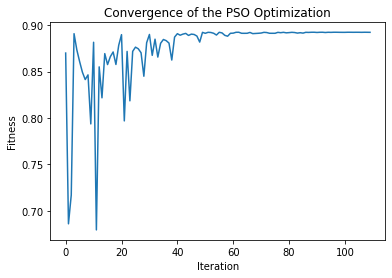

In [4]:
# Plot the convergence of the optimization
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Convergence of the PSO Optimization')
plt.show()


NameError: name 'hyperparameters_history' is not defined

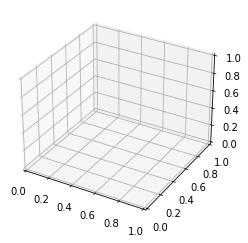

In [10]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def update(num, x, y, z):
    ax.scatter(x[:num], y[:num], z[:num], c='k', marker='o')
    ax.view_init(elev=30, azim=num)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(hyperparameters_history[0])-1), fargs=[hyperparameters_history[0],hyperparameters_history[1],hyperparameters_history[2]], repeat=True)

# Save the animation as an MP4 file
ani.save('animation.mp4', writer='ffmpeg', fps=30)

# Show the plot
plt.show()